In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
realUsers = pd.read_csv("/home/vxue/DataIncubator/datasets_full.csv/genuine_accounts.csv/users.csv")

In [20]:
fakeFollower = pd.read_csv("/home/vxue/DataIncubator/datasets_full.csv/fake_followers.csv/users.csv")

In [21]:
fakeSpammer = pd.read_csv("/home/vxue/DataIncubator/datasets_full.csv/social_spambots_1.csv/users.csv")

In [24]:
realUsers['isReal'] = 1
fakeFollower['isReal'] = 2
fakeSpammer['isReal']= 3

allUsers = pd.concat([realUsers,fakeFollower,fakeSpammer])

In [25]:
notNull = allUsers.dropna(subset=['created_at']).copy()

In [26]:
notNull['year_created'] = notNull.apply(lambda x: x['created_at'][-4:],axis=1)

In [27]:
notNull.sort_values(by='year_created',inplace=True)

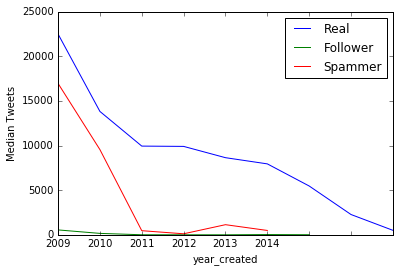

In [35]:
notNull[notNull.isReal==1].groupby('year_created')['statuses_count'].median().plot(label='Real')
notNull[notNull.isReal==2].groupby('year_created')['statuses_count'].median().plot(label='Follower')
notNull[notNull.isReal==3].groupby('year_created')['statuses_count'].median().plot(label='Spammer')
ylabel("Median Tweets")
legend()